In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
"""
 Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
"""

column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower_class']
df = pd.read_csv('iris.data', names=column_names)
df.flower_class = df.flower_class.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})
df.head()


,sepal_length,sepal_width,petal_length,petal_width,flower_class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


One to one linear correlation

In [3]:
# Show correlation among numeric features
corr = df.drop(columns='flower_class').corr(numeric_only=True)
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


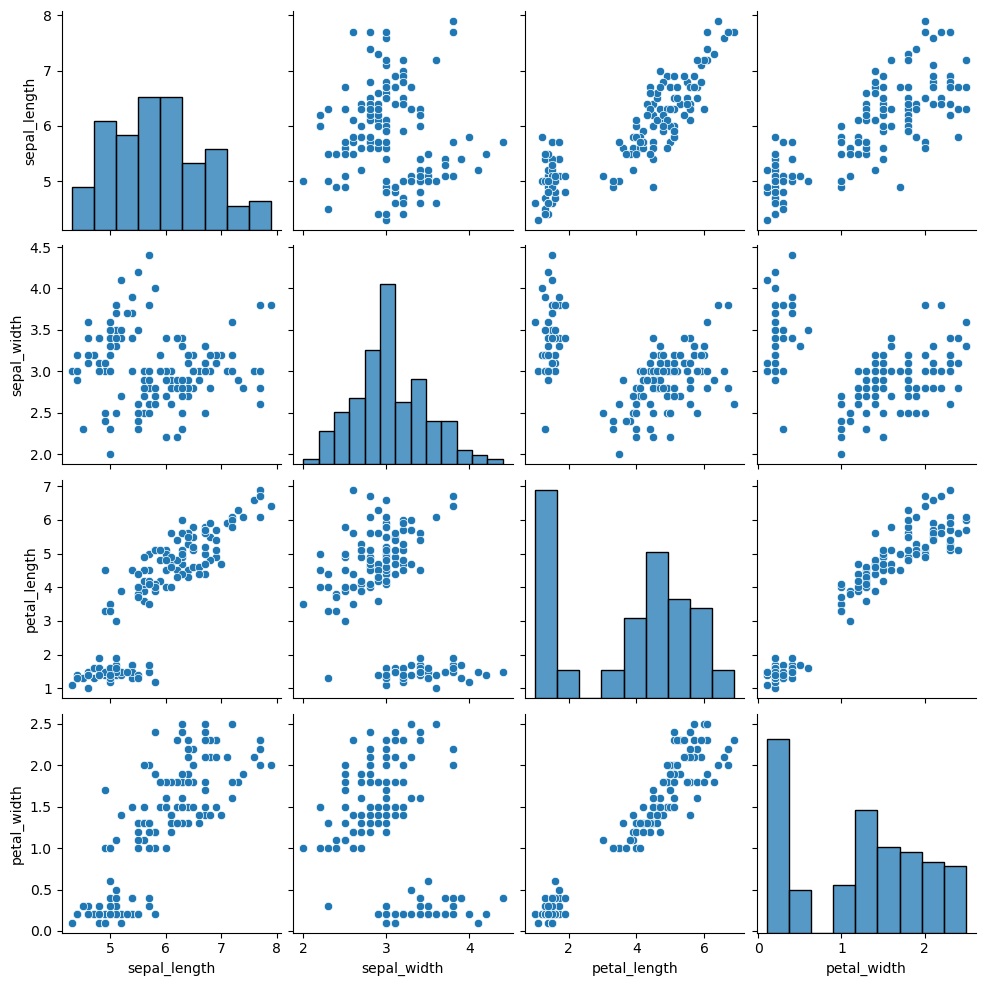

In [4]:
sns.pairplot(data=df.drop(columns='flower_class'))

Check VIF

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [6]:
# Define features
X = df[df.drop(columns=['flower_class', 'petal_length']).columns]
X = add_constant(X) # To avoid the estimated line for the calculated R^2 to pass on to the origin

# Create dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,feature,VIF
0,const,130.335559
1,sepal_length,3.414225
2,sepal_width,1.294507
3,petal_width,3.864678


PCA

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

<Axes: title={'center': 'PCA of Iris Dataset'}, xlabel='PC1', ylabel='PC2'>

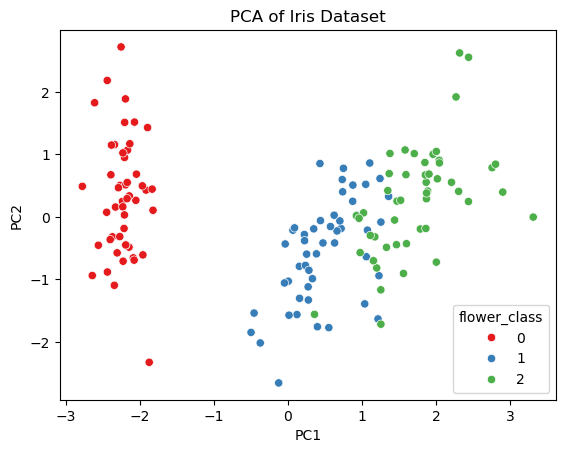

In [ ]:
# Extract numeric features only (excluding the flower class)
features = df.drop(columns=['flower_class']).columns
# Convert to NumPy
X = df[features].values

# Standardize the data
X_scaled = StandardScaler().fit_transform(X)


# Apply PCA
pca = PCA(n_components=2) # Use 2 components first for 2D
X_pca = pca.fit_transform(X_scaled)

# Visualize
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['flower_class'] = df['flower_class']
plt.title('PCA of Iris Dataset')
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='flower_class', palette='Set1')

In [9]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.72770452 0.23030523]


In [14]:
# Determine the loading scores. 
# Each row is a principal component, each column is an original feature
loadings = pca.components_
loading_df = pd.DataFrame(data=loadings.T, columns=['PC1', 'PC2'], index=features)
loading_df

,PC1,PC2
sepal_length,0.522372,0.372318
sepal_width,-0.263355,0.925556
petal_length,0.581254,0.021095
petal_width,0.565611,0.065416
